In [ ]:
import csv
import os

import ipywidgets as widgets
from IPython.display import clear_output, display
from PIL import Image

# Folder of images to label
image_folder = "public_test"

# Class labels and corresponding class numbers
class_labels = [
    "Exterior (Внешний вид)",
    "Room (Номер)",
    "Pool (Бассейн)",
    "Billiard (Бильярд)",
    "Bathroom (Ванная)",
    "Restaurant (Ресторан)",
    "Lobby (Лобби)",
    "Beach (Пляж)",
    "Corridors and stairs (Коридоры и лестницы)",
    "Food (Еда)",
    "Conference_room (Конференц-зал)",
    "Gym (Тренажерный зал)",
    "Balcony (Балконы)",
    "Terrace and patio (Террасы и патио)",
    "Spa and sauna (Спа и сауна)",
    "Остальное",
]

# Get the list of images
image_files = [f for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))]

# Dictionary to store the labels
image_labels = {}

# Create buttons for labeling
buttons = [widgets.Button(description=label) for label in class_labels]

# Define a function to display the next image
current_index = 0


def show_image(index):
    # Clear previous output
    clear_output(wait=True)

    # Load and display the image
    img_path = os.path.join(image_folder, image_files[index])
    img = Image.open(img_path)
    display(img)

    # Display buttons
    button_box = widgets.VBox(
        [widgets.HBox(buttons[i : i + 4]) for i in range(0, len(buttons), 4)]
    )
    display(button_box)


def on_button_click(button):
    global current_index
    image_name = image_files[current_index]
    image_labels[image_name] = (
        class_labels.index(button.description) + 1
    )  # Save class number (1-based)
    current_index += 1
    if current_index < len(image_files):
        show_image(current_index)
    else:
        clear_output(wait=True)
        print("All images have been labeled.")
        save_to_csv()


# Attach the callback to each button
for button in buttons:
    button.on_click(on_button_click)

# Function to save labels to a CSV file


def save_to_csv():
    with open("manual_image_labels.csv", mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["image_name", "class_number"])  # Header
        for image_name, class_number in image_labels.items():
            writer.writerow([image_name, class_number])
    print("Labels saved to manual_image_labels.csv")


# Display the first image and buttons

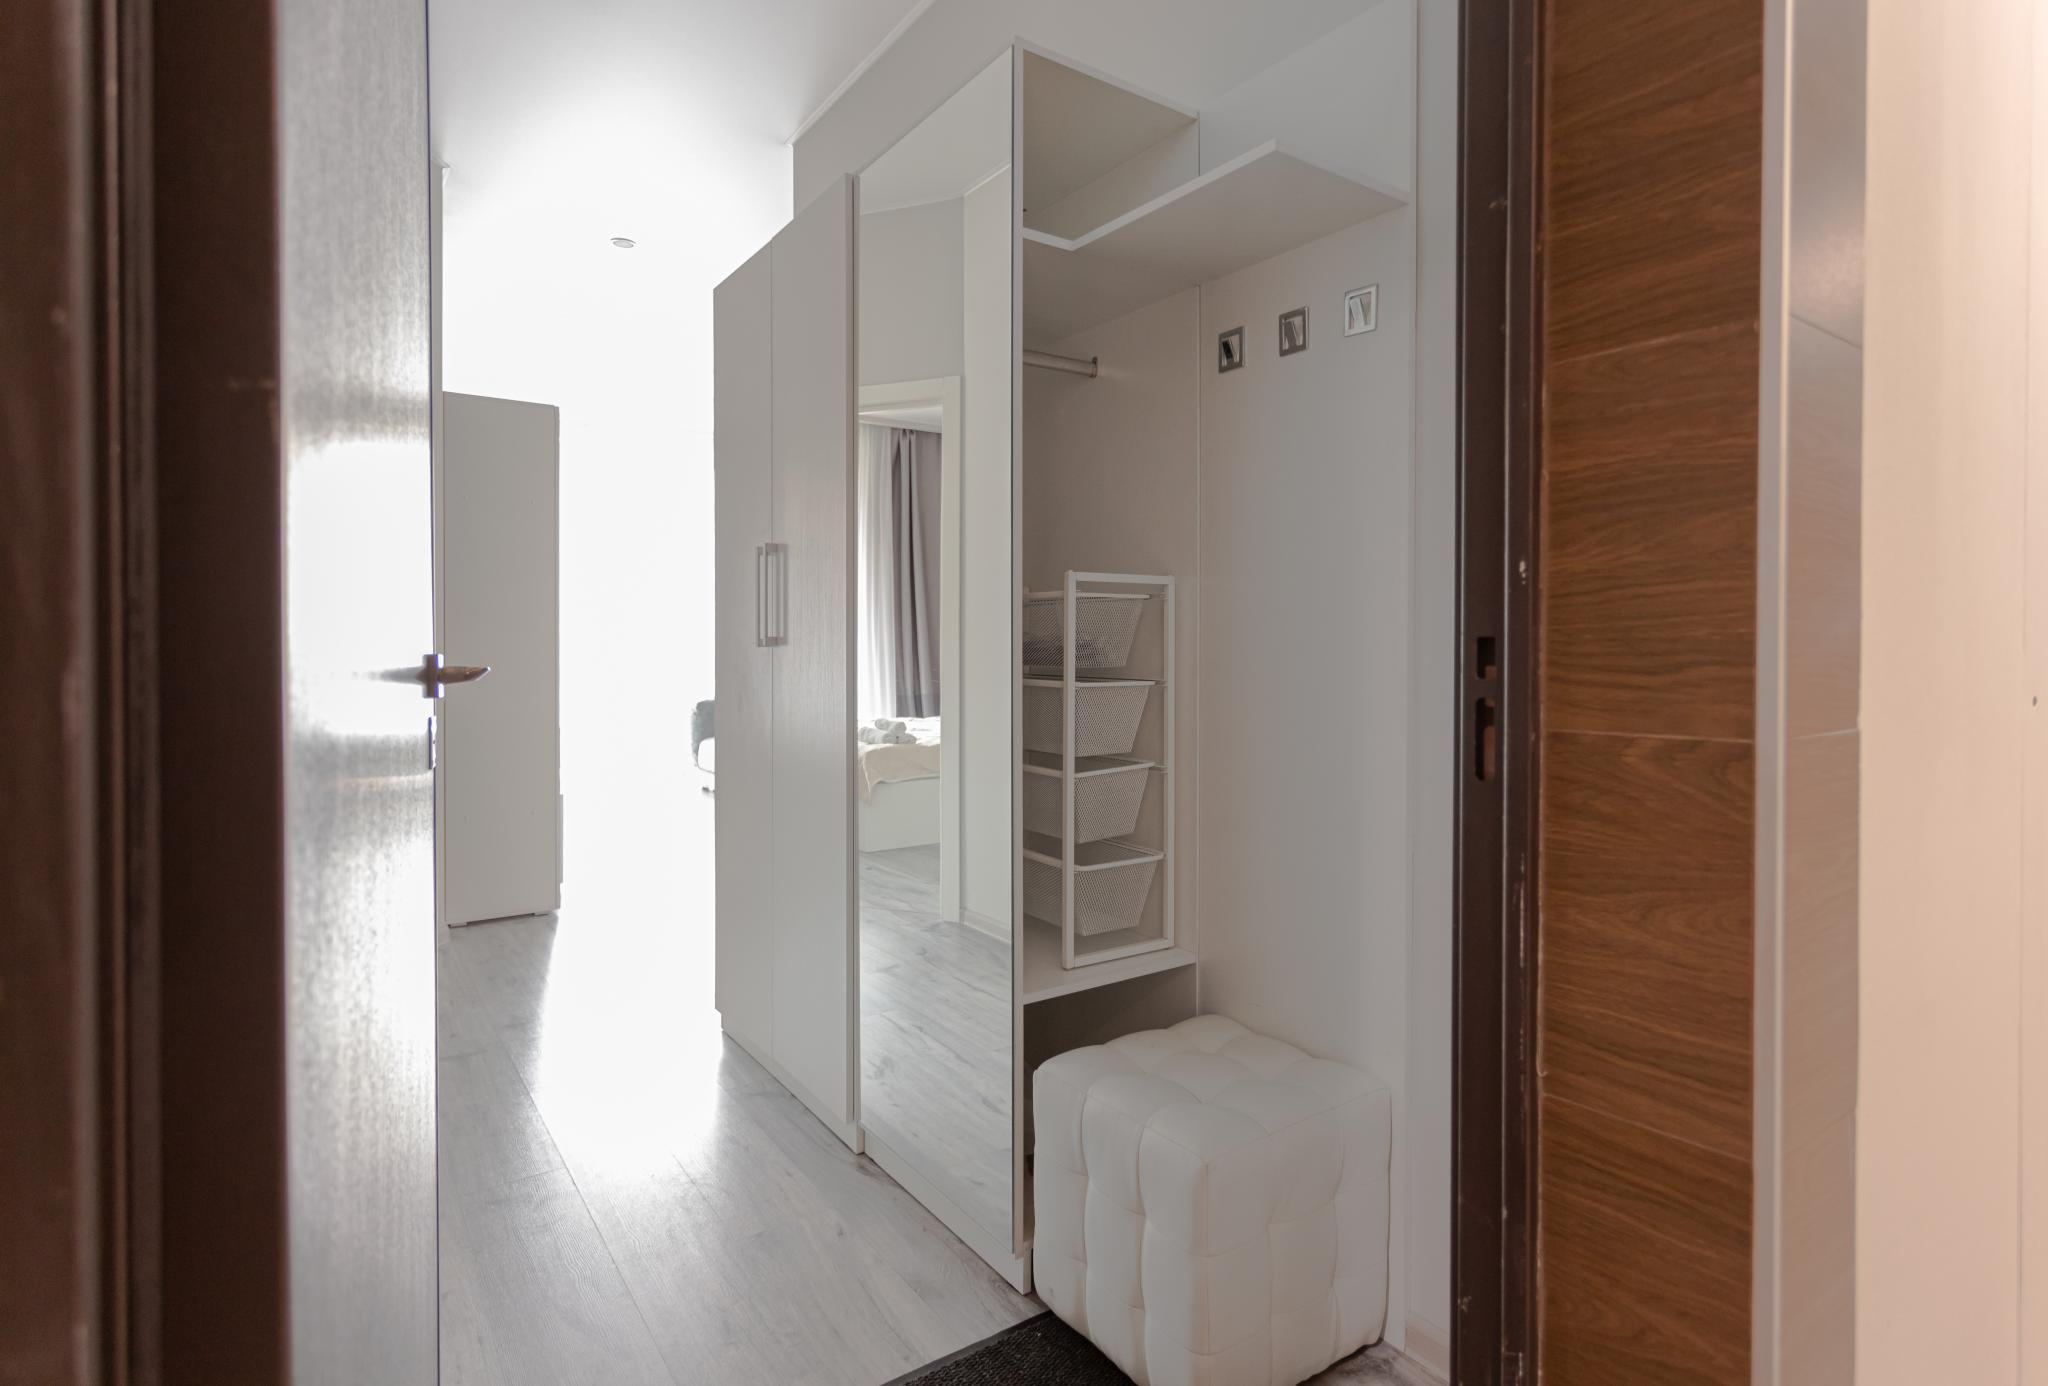

In [ ]:
show_image(current_index)